# Visualising the idea of synthetic data

In [ ]:
img1 = "/content/image 1.png"
img2 = "/content/image 2.png" 

import skimage
from skimage import io 


def readImage(path):
    img = io.imread ( path )
    print(f"read from {path}, shape of image is : {img.shape}") 
    return img

image1 = readImage ( img1 ) 
image2 = readImage ( img2 )

read from /content/image 1.png, shape of image is : (352, 500, 4)
read from /content/image 2.png, shape of image is : (342, 640, 4)


In [ ]:
x = min ( image1.shape[0], image2.shape[0] )
y = min ( image1.shape[1], image2.shape[1] ) 

ch = 3 

image1 = image1[:x, :y, :ch] 
image2 = image2[:x, :y, :ch] 

print ( image1.shape, image2.shape)

(342, 500, 3) (342, 500, 3)


In [ ]:
image1 = image1 / 255.0 
image2 = image2 / 255.0 

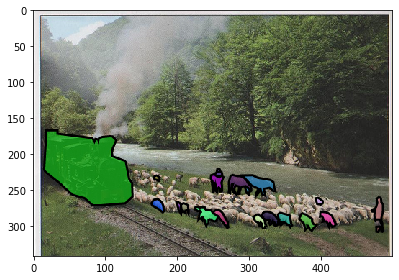

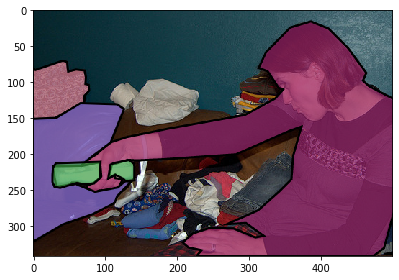

In [ ]:
io.imshow(image1);io.show()
io.imshow(image2) ; io.show()


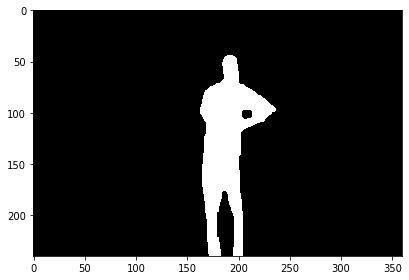

shape : (240, 360, 3)
[0. 1.]


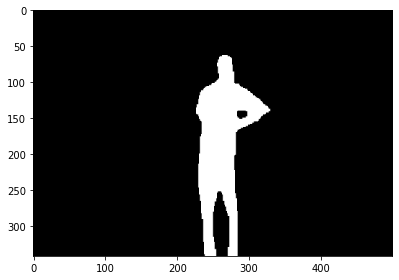

shape : (342, 500, 3)


In [ ]:
import numpy as np 
import cv2 

def generateMask( shape ) : 
    file = "/content/gt001503.png" 
    mask = cv2.imread ( file ) 
    mask = mask // 255.0 
    io.imshow(mask); io.show()
    print(f"shape : {mask.shape}")
    print(np.unique(mask))

    mask = cv2.resize ( mask, (shape[1], shape[0]) )

    io.imshow(mask); io.show()
    print(f"shape : {mask.shape}")
    # print(np.unique(mask))

    return mask 


mask = generateMask ( image1.shape )


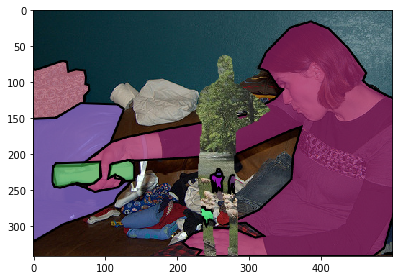

In [ ]:
targetImage = image1 * mask + image2 * ( 1 - mask ) 

io.imshow(targetImage); io.show() 

In [ ]:
io.imsave("./targetImage.png", targetImage)

<Figure size 2880x2880 with 0 Axes>

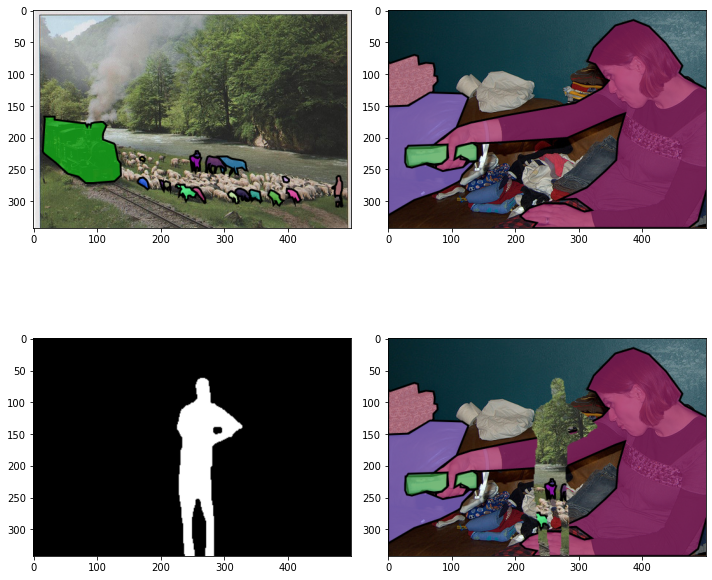

In [ ]:
import matplotlib.pyplot as plt 

plt.figure ( figsize = ( 40,40 )) 

fig, axes = plt.subplots(nrows = 2, ncols = 2 , figsize = (10,10))

images = [ [image1, image2],
           [mask, targetImage]
          ]

for (i, j), ax in np.ndenumerate ( axes ):
    ax.imshow(images[i][j] ) 
plt.tight_layout()

plt.savefig("./allInOne.png")
plt.show()

In [ ]:
from pycocotools.coco import COCO


# Working on COCO dataset

In [ ]:
# from pycocotools.coco import COCO
import numpy as np
import skimage.io as io 
import os 

In [ ]:
#---------------------
# download dataset
# uncomment and run only if necessary
#---------------------

# download dataset to drive
# https://stackoverflow.com/questions/55556965/importing-coco-datasets-to-google-colaboratory

!wget http://images.cocodataset.org/zips/train2017.zip

--2020-12-14 05:13:44--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.147.180
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.147.180|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  51.9MB/s    in 5m 2s   

2020-12-14 05:18:46 (61.0 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [ ]:
#----------------
# read a zipfile
#----------------

# https://stackoverflow.com/questions/19371860/python-open-file-in-zip-without-temporarily-extracting-it

import zipfile
zip = zipfile.ZipFile("train2017.zip", 'r')


In [ ]:
#--------------------------------
# Understand directory structure 
# and get list of files
#---------------------------------
def getListOfFiles(zip):
    a = zip.NameToInfo # the hashmap of directory , files as key 
    files = list ( a.keys() ) # get the keys and convert to list 

    print(f"initial : {files[:5]} ") 
    print(f"first index is {files[0]} => the main directory. remove it.")
    files.pop(0)

    print( f"updated : {files[:5]}" )
    print( f"total number of files we have : {len(files)}" )

    return files 

#----------------
# since we need any two 
# random images from the set
# total possible number of images are
# N choose 2
#----------------------------

def combination2(n):
    return n * ( n-1 ) / 2 

files = getListOfFiles(zip)
print(f"total possible pairs of two we can generate : { combination2( len(files)) }")
# 6_995_848_041

initial : ['train2017/', 'train2017/000000147328.jpg', 'train2017/000000414738.jpg', 'train2017/000000281563.jpg', 'train2017/000000063879.jpg'] 
first index is train2017/ => the main directory. remove it.
updated : ['train2017/000000147328.jpg', 'train2017/000000414738.jpg', 'train2017/000000281563.jpg', 'train2017/000000063879.jpg', 'train2017/000000531349.jpg']
total number of files we have : 118287
 total possible pairs of two we can generate : 6995848041.0


In [ ]:
def generateRandomTuple(n_of_tuples, files, replace = False ):
    x = np.random.choice(a = files, size=(n_of_tuples,2), replace=replace, p=None)
    return x

def generateUniqueSamples(samples):
    return np.unique(samples, axis = 0 )

In [ ]:
#test 
# generateRandomTuple(5, 10, False)

array([[6, 0],
       [2, 4],
       [9, 3],
       [7, 1],
       [5, 8]])

In [ ]:
# read image from zip 
# https://stackoverflow.com/a/57764175/11145013

# convert to numpy array
# https://stackoverflow.com/a/1095878/11145013

import zipfile
from PIL import Image

def readImageFromZip(zip, fileName )-> "np array":
    '''
    reads a image file from zip
    returns the numpy array
    '''

    # get a reference to file 
    data = zip.open( fileName )

    # read through PIL
    img = Image.open(data)

    # convert to numpy array 
    img = np.asarray ( img )
    
    return img 


In [ ]:
filename = generateRandomTuple ( n_of_tuples = 200_000, files = files, replace= True ) 

In [ ]:
print(filename.shape)

(200000, 2)


In [ ]:
temp = np.unique(filename, axis = 1 )

In [ ]:
temp.shape

(200000, 2)

In [ ]:
for i,x in np.ndenumerate ( filename ):
    img_x = readImageFromZip( zip, x )
    io.imshow(img_x); io.show() 
    print(img_x.shape)

Output hidden; open in https://colab.research.google.com to view.

# write Data class

In [ ]:
#---------------------
# download dataset
# uncomment and run only if necessary
#---------------------

# download dataset to drive
# https://stackoverflow.com/questions/55556965/importing-coco-datasets-to-google-colaboratory

# !wget http://images.cocodataset.org/zips/train2017.zip

In [2]:
import os
from glob import glob 
import numpy as np 
import cv2 

class CDNETMasks:

    def __init__(self, path_to_CDNET_folder ):
        self.root_dir = path_to_CDNET_folder 
        self.masks = self.getMasksList()

    def getMasksList( self ):
        ''' returns a list of masks ''' 

        if not os.path.exists( self.root_dir ) or len(os.listdir( self.root_dir ) ) == 0:
            raise(Exception(f"root_dir passed as {root_dir} either does not exists or h sub data folder") ) 

        gt_images = [] 

        for i, sub_dir in enumerate ( os.listdir(self.root_dir) ) :
            path = os.path.join( self.root_dir, sub_dir)
            temp_gt = sorted ( glob ( os.path.join ( path, "groundtruth") + "/*") ) 
        
            # read file for given valid range of images 
            temporalFile = os.path.join ( path, 'temporalROI.txt') 
            if not os.path.exists  ( temporalFile ):
                start = 0; end = len(temp_in) - 1 
            else:
                with open(temporalFile) as f:
                    start, end = f.readline().split() 
                    start = int ( start ) - 1 ; end = int(end) - 1  # indexing type 1 of temporalROI.txt 
            
            print(f"{i+1}. {sub_dir} : useful frames - start : {start}, end : { end } ")
            gt_images += temp_gt[start:end] 

        return gt_images  

    def readMask(self,filename, channel = 1 ):
        if channel == 1 :
            img = cv2.imread ( filename, 0 )
            img = img[:,:,np.newaxis]
            return img 

        return cv2.imread ( filename )
        
    def getProcessedMask(self, maskFileName ):
        ''' 
        transform the mask image w.r.t CDNET properties
    
        property 1 : mask is a 3 channel in CDNET
        property 2: it has 5 labels : 0, 50, 85, 170, 255 

        '''
        # read as one channel 
        maskImage = self.readMask ( maskFileName, channel = 3) 

        # convert all values less than 255 to 0 
        # convert dtype to float 
        maskImage = maskImage // 255.0  

        return maskImage 
  
    def getRandomMask(self)-> str :
        np.random.shuffle( self.masks )
        return np.random.choice(self.masks, replace= False)

    def __len__(self):
        return len ( self.masks )



In [6]:
import torch 
from torch.utils.data import DataLoader, Dataset
import zipfile 
import numpy as np 
import os 
from torchvision.transforms import RandomCrop,ColorJitter
import torchvision.transforms.functional as TF 
import random
from PIL import Image

class SyntheticData ( Dataset ):
    
    def __init__(self,
                 path_to_zip_file,
                 path_to_tuples,
                 path_to_CDNET,
                 mode = "train",
                 n_of_tuples = 200_000,
                ):
        self.mode = mode 

        # get a zip file reader
        self.zip = zipfile.ZipFile( path_to_zip_file, 'r')
        
        # directory structure => first level : zipName/  next_level : image1.jpg  image2.jpg ...
        
        # get the list of files in the zip 
        self.files = list ( self.zip.NameToInfo.keys() ) # get the keys and convert to list 
        self.files.pop(0) # first file is directory
        
        self.files_tuples = self.__getRandomTuples__(path_to_tuples = path_to_tuples, 
                                                     n_of_tuples = n_of_tuples , 
                                                    replace = True 
                                                ) 
        # getMasksList
        self.masksDataset = CDNETMasks ( path_to_CDNET ) 
        
        print ( f'''
                there are total masks = {len(self.masksDataset)} images
                and from COCO there are total images = { len(self.files) }
                we are generating : {n_of_tuples} tuples of two random images from COCO images.
               ''')
        
    def readImageFromZip(self, filename ):
        # get a reference to file 
        data = self.zip.open( filename )
        # read through PIL
        img = np.asarray ( Image.open(data) ) 
        return img 

    def __getRandomTuples__( self, path_to_tuples,  n_of_tuples, replace = True) : 
        '''generates tuples of format = ( randomImage1, randomImage2 ).
        path_to_tuples : path where to save or load from the tuples with extension .npy
        n_of_tuples : how many tuples of format to be generated. 
        replace : random sampling by replacement method.
        
        returns : a numpy array of shape ( n_of_tuples, 2) where each tuple is the file path of 
                two random images. 
        '''
        
        if os.path.exists ( path_to_tuples ):
            x = np.load ( path_to_tuples )
            print(f"tuples loaded from file { path_to_tuples }")
        else:
            x = np.random.choice(a = self.files, size=(n_of_tuples, 2), replace=replace, p=None)
            # remove duplicates
            x = np.unique( x, axis = 0 )
            x = np.unique( x, axis = 1 ) 
            np.save ( path_to_tuples, x )
            print(f"tuples saved to file { path_to_tuples}")
        return x 
    
    def __len__(self):
        return self.files_tuples.shape[0] 

    def transform( self, backgroundImage, randomImage2, mask, size = 224 ):

        # make image channel first and normalise to [0,1]
        backgroundImage = backgroundImage.transpose((2,1,0)) / 255.0 
        randomImage2 = randomImage2.transpose( (2,1,0) ) / 255.0  
        mask = mask.transpose((2,1,0))

        # make tensor
        backgroundImage, randomImage2, mask  = torch.from_numpy( backgroundImage ), torch.from_numpy ( randomImage2 ), torch.from_numpy ( mask )
        
        # random crop of size
        cropper = RandomCrop( size = size, pad_if_needed=True, fill=0, padding_mode='constant' ) 
        backgroundImage, randomImage2, mask = cropper ( backgroundImage ), cropper( randomImage2) , cropper( mask )

        # training specific
        if self.mode == "train":
            colorJitter = ColorJitter( brightness = (0.5, 2), contrast = 0.2, saturation= 0.2 )
            backgroundImage = colorJitter ( backgroundImage )

        return backgroundImage, randomImage2, mask 

    def __getitem__(self, idx):

        if torch.is_tensor(idx): idx = idx.to_list() 
        shape = lambda x : print(x.shape)
        
        # choose 3 images
        randomImage1_filename, randomImage2_filename = self.files_tuples[idx]
        mask_filename = self.masksDataset.getRandomMask()

        # read the three images
        backgroundImage = self.readImageFromZip( randomImage1_filename ) 
        randomImage2 = self.readImageFromZip( randomImage2_filename ) 
        mask = self.masksDataset.getProcessedMask ( mask_filename ) 
        # shape(backgroundImage); shape(randomImage2); shape(mask)

        # get the transormed tensors 
        backgroundImage, randomImage2, mask = self.transform ( backgroundImage, randomImage2, mask, size = 224 )
        
        # shape(backgroundImage); shape(randomImage2); shape(mask)

        # formulate the target image 
        inputImage = backgroundImage * (1-mask) + randomImage2 * ( mask ) 

        return inputImage, backgroundImage, mask 


In [7]:
folderCOCO = os.path.join ( "/content/drive/MyDrive/Projects/BGS", "COCO" )  
folderCDNET = os.path.join ( "/content/drive/MyDrive/Projects/BGS", "DATA" )

if not os.path.exists(folderCOCO):
    os.makedirs ( path_to_tuples ) 

path_to_zip_file = "train2017.zip"
path_to_tuples = os.path.join ( folderCOCO, "train_tuples.npy" )
n_of_train_samples_to_generate = 200_000 

In [ ]:

# MasksDataset = Masks ( folderCDNET )
# print ( len(MasksDataset))

In [8]:
SynDataset = SyntheticData ( path_to_zip_file, path_to_tuples, folderCDNET, "train", n_of_train_samples_to_generate)
print (SynDataset.files_tuples.shape)
print ( SynDataset.files_tuples[0])
inputImage, backgroundImage, mask = SynDataset[0]

shape = lambda x : print ( x.shape )
shape(inputImage); shape(backgroundImage); shape(mask)

tuples loaded from file /content/drive/MyDrive/Projects/BGS/COCO/train_tuples.npy
1. canoe : useful frames - start : 799, end : 1188 
2. fall : useful frames - start : 999, end : 3999 
3. fountain01 : useful frames - start : 399, end : 1183 
4. fountain02 : useful frames - start : 499, end : 1498 
5. overpass : useful frames - start : 999, end : 2999 
6. pedestrians : useful frames - start : 299, end : 1098 
7. PETS2006 : useful frames - start : 299, end : 1199 
8. highway : useful frames - start : 469, end : 1699 
9. office : useful frames - start : 569, end : 2049 
10. backdoor : useful frames - start : 399, end : 1999 
11. bridgeEntry : useful frames - start : 999, end : 1749 
12. busStation : useful frames - start : 299, end : 1249 
13. busyBoulvard : useful frames - start : 729, end : 1744 
14. bungalows : useful frames - start : 299, end : 1699 
15. cubicle : useful frames - start : 1099, end : 7399 
16. copyMachine : useful frames - start : 499, end : 3399 
17. fluidHighway : us

30
----------------------------------------


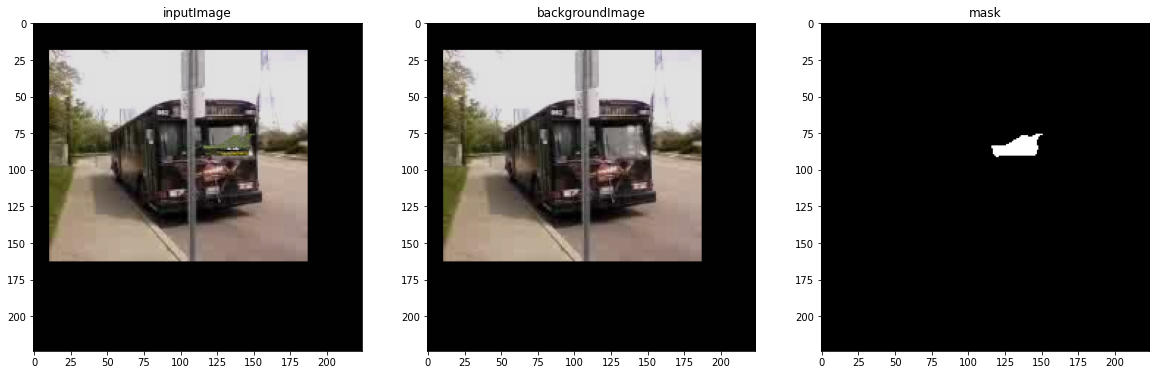

----------------------------------------


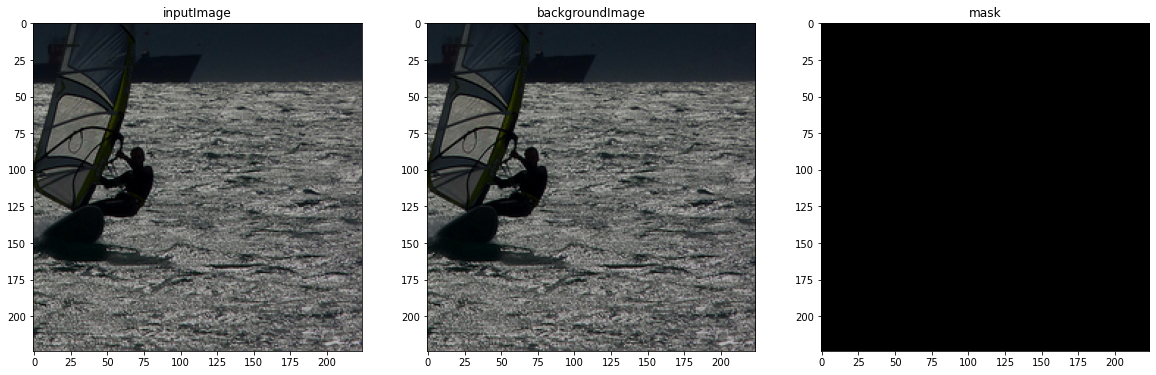

----------------------------------------


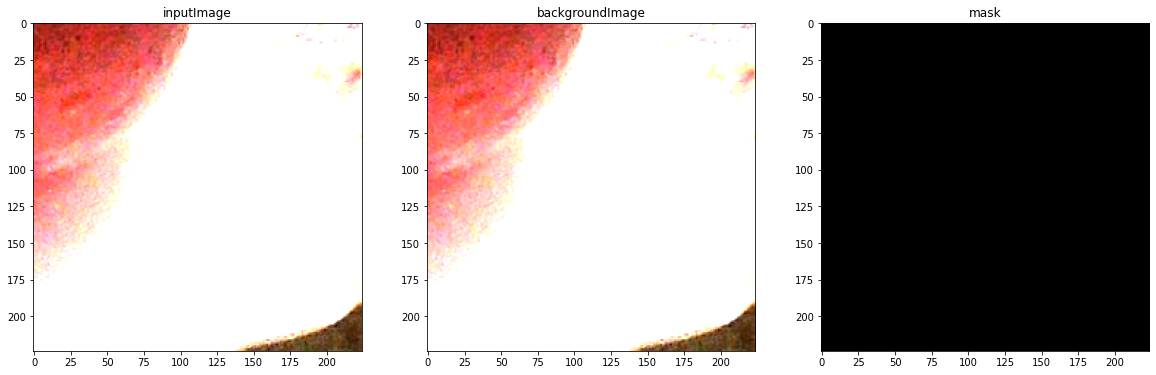

----------------------------------------


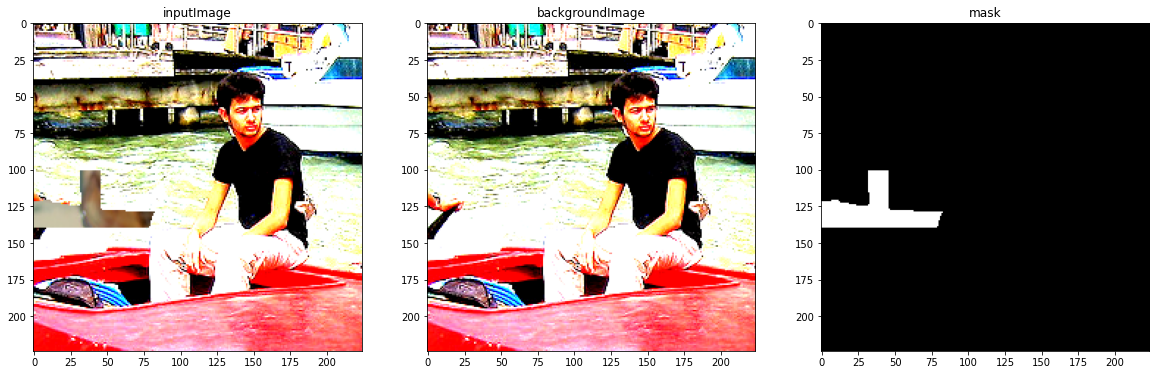

----------------------------------------


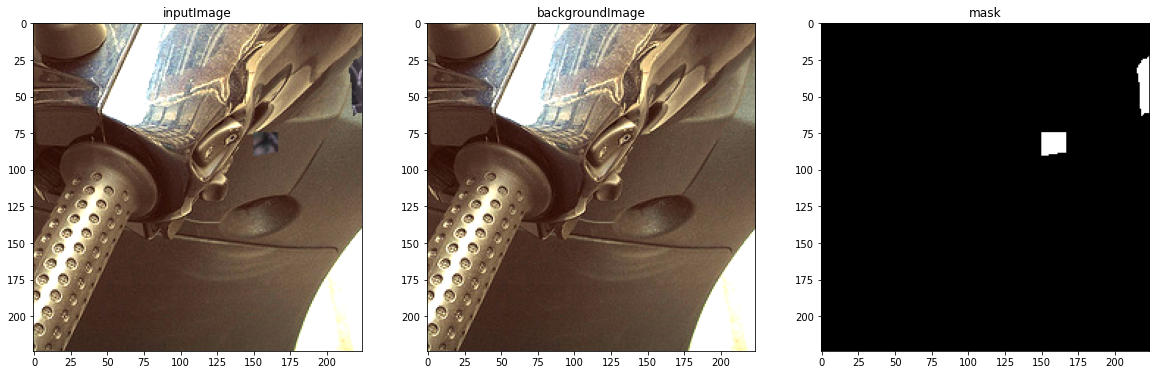

In [ ]:
import matplotlib.pyplot as plt 
from glob import glob 

indices = np.random.choice ( a = len(SynDataset), size = 5 )

samplePath = os.path.join ( folderCOCO, "sampleGenerated")
# print(samplePath)
if not os.path.exists(samplePath):
    os.makedirs(samplePath) 

index = len ( os.listdir(samplePath) ) 
print( index )

for idx in indices :
    index += 1 
    
    print("-"*40)
    inputImage, backgroundImage, mask = SynDataset[idx]

    shape = lambda x : print ( x.shape )
    # shape(inputImage); shape(backgroundImage); shape(mask)

    inputImage = inputImage.numpy()
    backgroundImage = backgroundImage.numpy()
    mask = mask.numpy()

    transpose = lambda x : x.transpose((2,1,0))
    inputImage = transpose(inputImage)
    backgroundImage = transpose ( backgroundImage )
    mask = transpose ( mask )

    # shape(inputImage); shape(backgroundImage); shape(mask)

    fig, axes = plt.subplots( 1, 3, figsize = (20,20) )
    axes[0].imshow(inputImage); axes[0].set_title( "inputImage" ) 
    axes[1].imshow(backgroundImage); axes[1].set_title("backgroundImage")
    axes[2].imshow(mask); axes[2].set_title("mask")
    path = os.path.join ( samplePath, f"{index}" + ".png" )
    plt.savefig(path)
    plt.show()